# Greyscaling, Colour, Histogram and Drawing

**Greyscaling:** Images are composed exclusively of shades of grey, with the intensity varying from black to white. According to [this](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0029740) article, not all color-to-grayscale algorithms work equally well (but I do not need to worry about this now).

**Colour of images:** RGB = red, green, blue; HSV = hue, saturation, value; CMYK = cyan, magenta, yellow and black

**Drawing:** see [here](https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html)

In [1]:
import cv2
import urllib
from skimage import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Convert local image to greyscale

/usr/local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


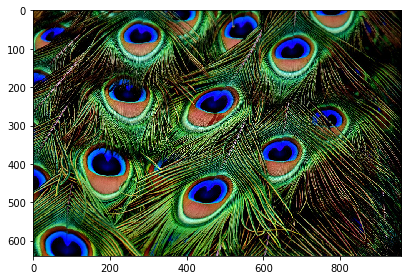

In [2]:
feather = io.imread("./images/pena_pavao.jpg")
io.imshow(feather)
io.show()

<class 'numpy.ndarray'> (640, 960) float64


/usr/local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


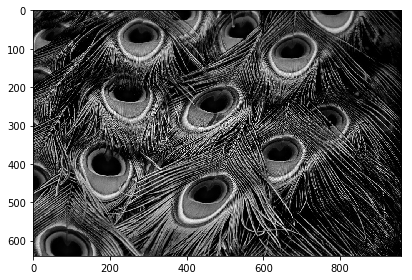

In [3]:
feather = io.imread("./images/pena_pavao.jpg", as_grey=True)
print(type(feather), feather.shape, feather.dtype)
io.imshow(feather)
io.show()

In [4]:
image = cv2.imread("./images/pena_pavao.jpg", 0)
cv2.imshow('Grayscale', image)
#cv2.waitKey(0) dont use this one on jupyter notebook
cv2.startWindowThread()
cv2.destroyAllWindows()

# save image
cv2.imwrite('./images/pavao_grey.jpg', image)

True

## Convert web image to greyscale

In [5]:
urls = [
    "https://goo.gl/VTM6eJ",
    "https://goo.gl/26dtHN",
    "https://goo.gl/cnWBz4",
    "https://goo.gl/1Dz4Yw"
]

In [6]:
# If I want to save them as they are
count = 0
for url in urls:
    print ("downloading{0}".format(url))
    image = io.imread(url)
    cv2.startWindowThread()
    cv2.imwrite("out_" + str(count) + ".png", cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    count +=1

downloadinghttps://goo.gl/VTM6eJ
downloadinghttps://goo.gl/26dtHN
downloadinghttps://goo.gl/cnWBz4
downloadinghttps://goo.gl/1Dz4Yw


<class 'numpy.ndarray'> (639, 960, 3) uint8


/usr/local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


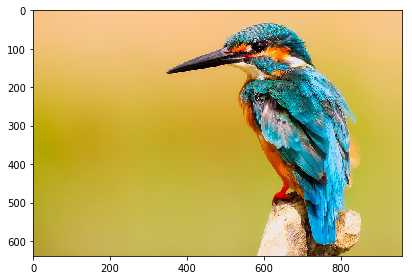

In [7]:
bird = io.imread("https://goo.gl/1Dz4Yw")
print(type(bird), bird.shape, bird.dtype)
io.imshow(bird)
io.show()

In [8]:
count = 0
for url in urls:
    print ("downloading{0}".format(url))
    image = io.imread(url)
    cv2.startWindowThread()
    cv2.imwrite("gray_out_" + str(count) + ".png", cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
    count +=1

downloadinghttps://goo.gl/VTM6eJ
downloadinghttps://goo.gl/26dtHN
downloadinghttps://goo.gl/cnWBz4
downloadinghttps://goo.gl/1Dz4Yw


/usr/local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


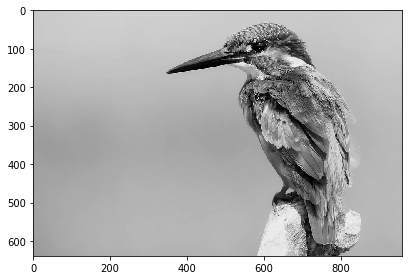

In [9]:
bird = io.imread("https://goo.gl/1Dz4Yw", as_grey=True)
#print(type(bird), bird.shape, bird.dtype)
io.imshow(bird)
io.show()

## Colour spec

In [10]:
imageG = cv2.imread('./images/pavao_grey.jpg')

### Check individual colour level for some pixels (RGB)

Red, Green and Blue range from 0 to 255

In [11]:
# First pixel
B, G, R = image[0,0]
print(B, G, R)
print(imageG.shape)

250 192 129
(640, 960, 3)


In [12]:
B, G, R = image[10, 50] 
print(B, G, R)
print(imageG.shape)

249 197 139
(640, 960, 3)


#### What's the RGB for the greyscale image?

In [13]:
gray_img=cv2.cvtColor(imageG, cv2.COLOR_BGR2GRAY)
print(gray_img[0, 0])
print(gray_img.shape) 

46
(640, 960)


Note that this shape means (640, 960, 1), whereas for the clour image I had (640, 960, 3). 3 channel for colour (RGB) and I for greyscaled image.

Also, now weach pixel has only one value(previously 3) with a range from 0 to 255.

### HSV

H: 0 - 18

S: 0 - 255

V: 0 - 255

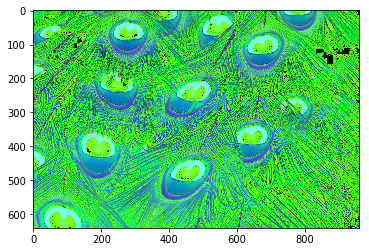

In [14]:
image = cv2.imread("./images/pena_pavao.jpg")
RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_image)

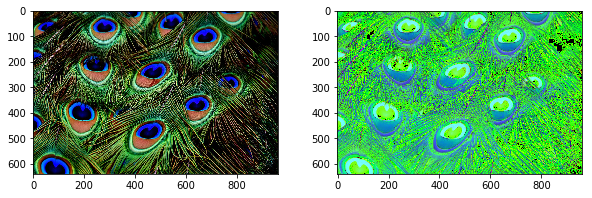

In [15]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.imshow(RGB_image)

plt.subplot(1, 2, 2)
plt.imshow(hsv_image)

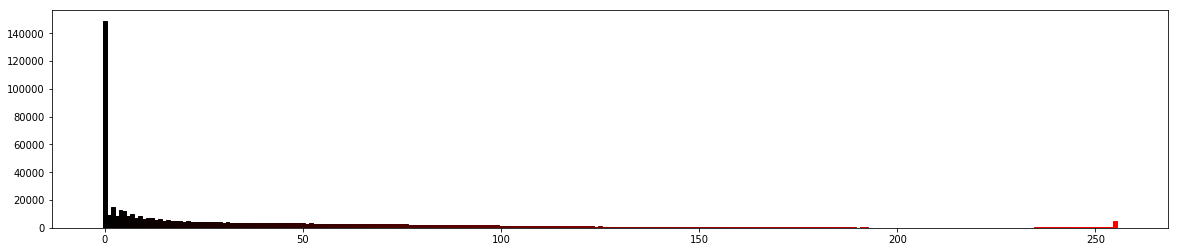

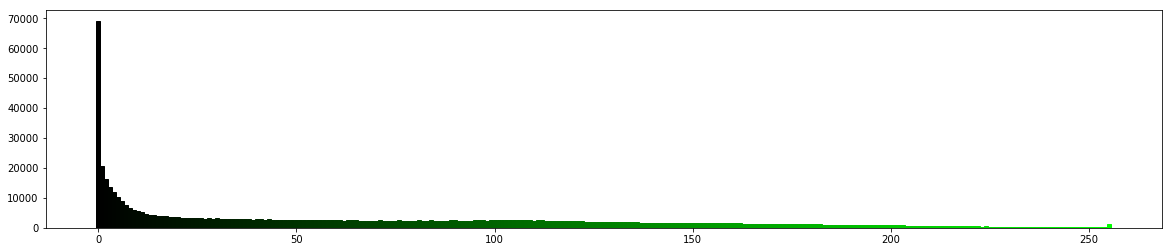

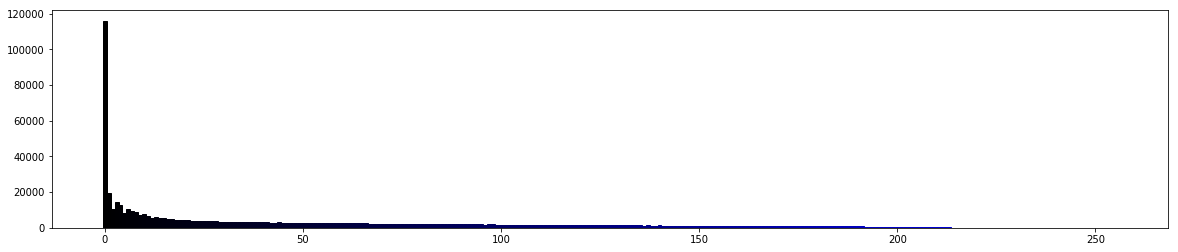

In [16]:
def show_rgb_hist(image):
    colours = ('r','g','b')
    for i, c in enumerate(colours):
        plt.figure(figsize=(20, 4))
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])

        if c == 'r': colours = [((i/256, 0, 0)) for i in range(0, 256)]
        if c == 'g': colours = [((0, i/256, 0)) for i in range(0, 256)]
        if c == 'b': colours = [((0, 0, i/256)) for i in range(0, 256)]

        plt.bar(range(0, 256), histr, color=colours, edgecolor=colours, width=1)

        plt.show()

show_rgb_hist(image)

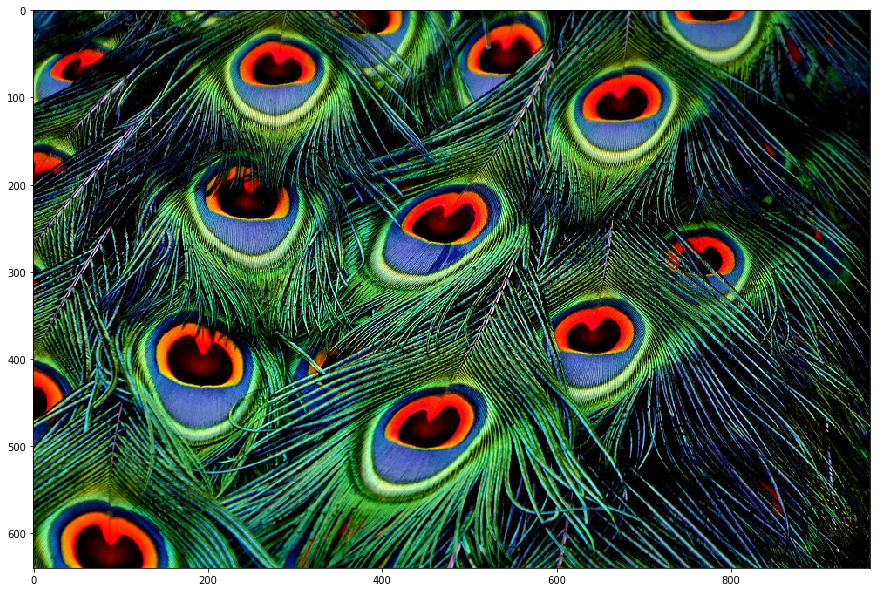

In [17]:
def show(image):
    # Figure size in inches
    plt.figure(figsize=(15, 15))

    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')

show(image)

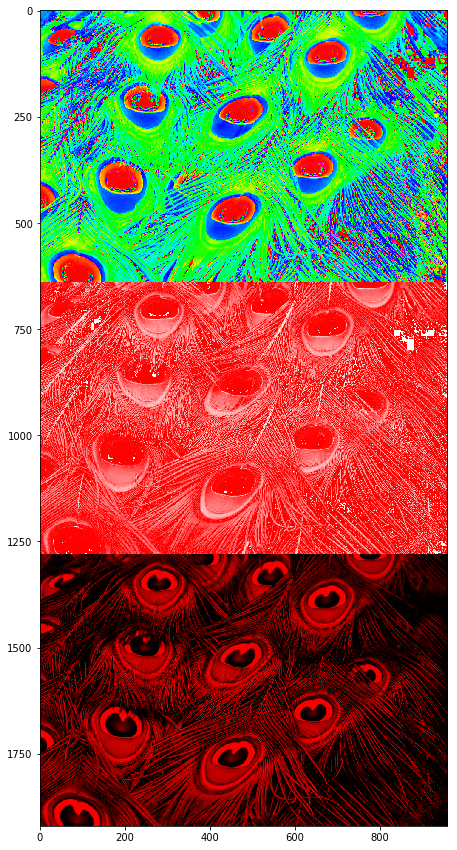

In [18]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

images = []
for i in [0, 1, 2]:
    colour = hsv.copy()
    if i != 0: colour[:,:,0] = 0 # hue
    if i != 1: colour[:,:,1] = 255 # saturation
    if i != 2: colour[:,:,2] = 255 # value
    images.append(colour)

hsv_stack = np.vstack(images)
rgb_stack = cv2.cvtColor(hsv_stack, cv2.COLOR_HSV2RGB)
show(rgb_stack)



#### Individual channels in an RGB image

In [19]:
# on a .py I can generate the colours individually
image = cv2.imread("./images/pena_pavao.jpg")
RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
B, G, R = cv2.split(RGB_image)

print(B.shape)
cv2.imwrite("./images/pavao_red.jpg", R)
cv2.imwrite("./images/pavao_blue.jpg", B)
cv2.imwrite("./images/pavao_green.jpg", G)

# merge colours again
merged = cv2.merge([B, G, R]) 
cv2.imwrite("./images/pavao_merged.jpg", merged)

(640, 960)


True

In [20]:
zeros = np.zeros(image.shape[:2], dtype = "uint8")

Rmerged = cv2.merge([zeros, zeros, R]) 
Gmerged = cv2.merge([zeros, G, zeros])
Bmerged = cv2.merge([B, zeros, zeros])
cv2.imwrite("./images/pavao_RedRed.jpg", Rmerged)
cv2.imwrite("./images/pavao_GreenGreen.jpg", Gmerged)
cv2.imwrite("./images/pavao_BlueBlue.jpg", Bmerged)


True